In [10]:
# !pip3 install --ignore-installed --upgrade tensorflow
# !pip3 install matplotlib
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [16]:
# 단어 벡터를 분석해볼 임의의 문장들
sentences = ["나 학생이다",
             "나 강아지 좋다",
             "나 동물 좋다",
             "강아지 고양이 동물",
             "나 고양이 싫다"
             "강아지 여자친구 좋다", 
             "강아지 생선 우유 싫다",
             "고양이 생선 싫다 우유 좋다",
             "강아지 고양이 눈 좋다",
             "나 친구 좋다",
             "친구 나 좋다",
             "친구 나 영화 책 게임 좋다",
             "나 게임 책 동물 좋다",
             "고양이 강아지 싫다",
             "강아지 고양이 좋다"]

In [17]:
word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))

In [18]:
word_dict = {w: i for i, w in enumerate(word_list)}
word_dict

{'학생이다': 0,
 '고양이': 1,
 '동물': 2,
 '나': 3,
 '우유': 4,
 '여자친구': 5,
 '게임': 6,
 '생선': 7,
 '책': 8,
 '싫다': 9,
 '강아지': 10,
 '눈': 11,
 '친구': 12,
 '영화': 13,
 '싫다강아지': 14,
 '좋다': 15}

In [19]:
skip_grams = []

for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]
    
    for w in context:
        skip_grams.append([target, w])


In [20]:
def random_batch(data, size) :
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace = False)
    
    for i in random_index :
        random_inputs.append(data[i][0])
        random_labels.append([data[i][1]])
        
    return random_inputs, random_labels

In [21]:
training_epoch = 1000
learning_rate = 0.01
batch_size = 20

embedding_size = 2

num_sampled = 15

voc_size = len(word_list)

In [22]:
tf.compat.v1.disable_eager_execution()

In [23]:
inputs = tf.placeholder(tf.int32, shape=[batch_size])

labels = tf.placeholder(tf.int32, shape = [batch_size, 1])

embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))

selected_embed = tf.nn.embedding_lookup(embeddings, inputs)

nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

loss = tf.reduce_mean(tf.nn.nce_loss(nce_weights, nce_biases, labels, selected_embed, num_sampled, voc_size))

train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [24]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

loss_val_list = []

for step in range(1, training_epoch+1):
    batch_inputs, batch_labels = random_batch(skip_grams, batch_size)
    _, loss_val = sess.run([train_op, loss],
                           feed_dict={inputs: batch_inputs,
                                      labels: batch_labels})
    
    loss_val_list.append(loss_val)

    if step % 200 == 0:
        print(f"loss at step, step : {step}: {loss_val}")

loss at step, step : 200: 3.501929759979248
loss at step, step : 400: 3.4102985858917236
loss at step, step : 600: 3.333543300628662
loss at step, step : 800: 2.9429633617401123
loss at step, step : 1000: 3.146132230758667


In [25]:
trained_embeddings = sess.run(embeddings, feed_dict={inputs: batch_inputs,
                                                     labels: batch_labels})

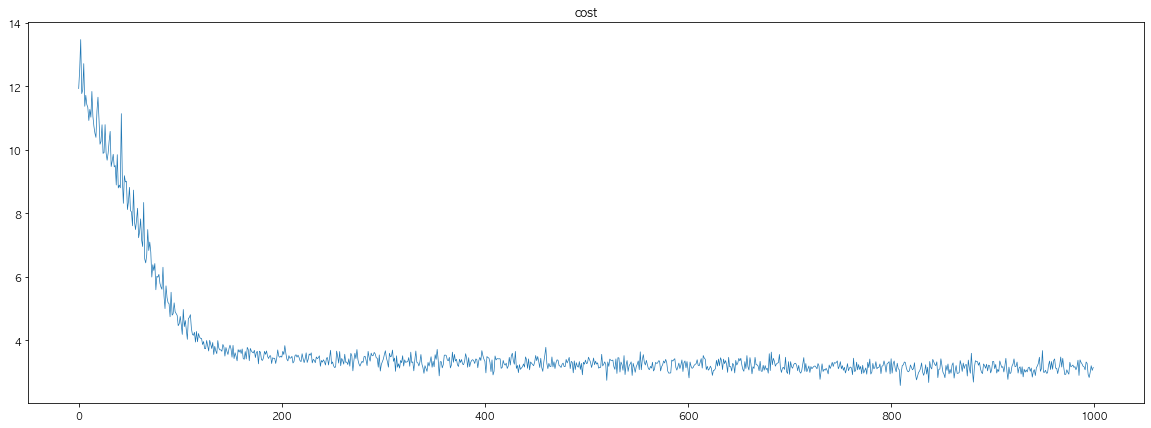

In [26]:
plt.figure(figsize=(20, 7))
plt.title("cost")
plt.plot(loss_val_list, linewidth=0.7)
plt.show()

In [27]:
# matplotlib 한글 표시
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

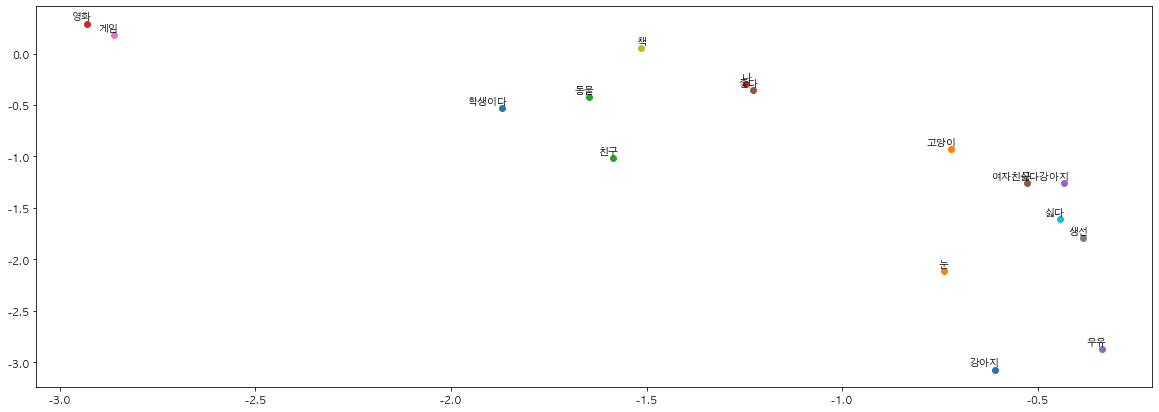

In [28]:
plt.figure(figsize=(20, 7))

for i, label in enumerate(word_list) :
    x, y = trained_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x,y), xytext=(5,2),
                textcoords='offset points', ha='right', va='bottom')
    
plt.show()

In [2]:
import matplotlib as mpl
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정파일 위치: ', mpl.matplotlib_fname())

버전:  3.3.1
설치 위치:  /usr/local/lib/python3.8/site-packages/matplotlib/__init__.py
설정 위치:  /Users/lhjoo/.matplotlib
캐시 위치:  /Users/lhjoo/.matplotlib
설정파일 위치:  /usr/local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


In [5]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

384


In [8]:
for i in font_list :
    if "Nanum" in i :
        print(i)

/System/Library/AssetsV2/com_apple_MobileAsset_Font6/ee9e9584cd1a5f676e03a9efcc80783bc7e12e2c.asset/AssetData/NanumGothic.ttc
/System/Library/AssetsV2/com_apple_MobileAsset_Font6/5c10807185ddbca859bc0b3ecefe55ebb1985aa9.asset/AssetData/NanumMyeongjo.ttc
/System/Library/AssetsV2/com_apple_MobileAsset_Font6/3b0bb049516d6dd825e1cd8731587ca7415517ff.asset/AssetData/NanumScript.ttc


In [11]:
plt.rcParams["font.family"] = 'Nanum Brush Script OTF'